In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Setting style
# plt.style.use('seaborn-muted')
sns.set_palette('bright')


In [2]:
df=pd.read_csv('survey.csv')
#printing first five rows
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
print("Shape of dataset ",df.shape)

Shape of dataset  (1259, 27)


In [4]:
#Getting the information about the dataset(null values and data types)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Overview of NULL values


In [5]:
missing_values=df.isnull().sum()
miss_perc=(missing_values/len(df))*100
missing_df=pd.DataFrame({'Null Count':missing_values,
              'perc':miss_perc})
missing_df

,Null Count,perc
Timestamp,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Country,0,0.000000
state,515,40.905481
self_employed,18,1.429706
family_history,0,0.000000
treatment,0,0.000000
work_interfere,264,20.969023
no_employees,0,0.000000


Data Cleaning

In [6]:
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [7]:
#a copy of the original dataset for data cleaning
df_clean=df.copy()
print("distribution(before cleaning)")
print(df_clean['Age'].describe())
df_clean['Age'].unique()

#Filtering dataset on the basis of valid age
df_clean=df_clean[(df_clean['Age']>=22) & (df_clean['Age']<=72)]
print("distribution(after cleaning)")
print(df_clean['Age'].describe())

distribution(before cleaning)
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
distribution(after cleaning)
count    1213.000000
mean       32.460841
std         7.062626
min        22.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


Dealing with Gender Anomalies

In [8]:

print(df_clean['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'Woman' 'f' 'Mal' 'Male (CIS)'
 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'Enby'
 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'cis-female/femme'
 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male ' 'Man' 'msle' 'Neuter'
 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [9]:

df_clean['Gender']=df_clean['Gender'].apply(lambda x:x.lower())
df_clean['Gender'].unique()




array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'cis male', 'woman', 'mal', 'male (cis)',
       'queer/she/they', 'non-binary', 'femake', 'make', 'nah', 'enby',
       'fluid', 'genderqueer', 'female ', 'androgyne', 'cis-female/femme',
       'guy (-ish) ^_^', 'male leaning androgynous', 'male ', 'man',
       'msle', 'neuter', 'female (trans)', 'queer', 'female (cis)',
       'mail', 'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
lMale=['m','male','male-ish','male-ish','cis male','mal','male (cis)',
           'guy (-ish) ^_^','male ','man','malr','cis man']
lFemale=['female','cis female','f','woman','femake','cis-female/femme','female (cis)',
            'femail' ]
lOthers=['trans-female','non-binary', 'genderqueer',
             'androgyne', 'agender','male leaning androgynous','trans woman','neuter', 'female (trans)', 'queer',
             ]
def cleanGender(x):
    
    
    
    
    if x in lMale:
        return 'Male'
    if x in lFemale:
        return 'Female'
    if x in lOthers:
        return 'Other'
    return 'Not specified'
    
           

In [11]:
df_clean['Gender']=df_clean['Gender'].apply(cleanGender)
df_clean['Gender'].unique()

array(['Female', 'Male', 'Not specified', 'Other'], dtype=object)

Dealing with no_employees column

In [12]:
print(df_clean['no_employees'].unique())

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [13]:
def cleanEmployee(x):
    x=str(x)
    if x.startswith("More than"):
      x=x.split()
      num=int(x[2])
      return num
 
    else:
      x=x.split('-')
      num=[int(i.strip()) for i in x if i.strip().isdigit()]
      return sum(num)//2
    
df_clean['no_employees']=df_clean['no_employees'].apply(cleanEmployee)

df_clean['no_employees'].dtype


dtype('int64')

Dealing with missing values

In [14]:
#For 'state' column strategy used is 'Unknown'
df_clean['state'].fillna("Unknown",inplace=True)


#For 'work_interfere' column strategy used is 'mode'
df_clean['work_interfere'].fillna(df['work_interfere'].mode()[0],inplace=True)

#For 'self_employed' column, strategy used is 'mode'
df_clean['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

#For 'comments' column, strategy used is 'Unknown'
df_clean['comments'].fillna("Unknown",inplace=True)




Cleaning categorical columns

In [15]:
#finding the unique values for each column

for col in df_clean.columns:
    print(df_clean[col].unique())
    print('\n')

['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']


[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 28 26 22 25
 45 43 56 60 54 55 48 57 58 47 62 51 65 49 53 61 72]


['Female' 'Male' 'Not specified' 'Other']


['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Switzerland' 'Poland' 'Australia' 'Germany' 'Mexico' 'Brazil'
 'Costa Rica' 'Austria' 'Ireland' 'India' 'South Africa' 'Russia' 'Italy'
 'Netherlands' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'China'
 'Czech Republic' 'Philippines']


['IL' 'IN' 'Unknown' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA'
 'IA' 'PA' 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC'
 'NE' 'WV' 'OK' 'KS' 'VA' 'NH' 'AL' 'NV' 'NJ' 'S

In [16]:
df_clean.shape

(1213, 27)

Outlier removal for numerical columns

In [17]:
#Outlier detection using quantile method
def remove(df_clean,num_columns):
 for col in num_columns:
    
    values=df_clean[col]
    q1=values.quantile(0.25)
    q3=values.quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    outliers=values[(values<lower_bound) | (values>upper_bound)]
    print(f"outliers for {col} :")
    print(outliers)
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
 return df_clean

num_columns=df_clean.select_dtypes(include=['number']).columns
print(num_columns)
df_clean=remove(df_clean,num_columns)
df_clean.shape
df_clean.info()
df_clean.head()

Index(['Age', 'no_employees'], dtype='object')
outliers for Age :
38      50
294     56
297     60
347     54
372     55
419     55
466     57
471     58
475     57
498     54
520     62
527     51
560     65
574     50
581     50
606     50
631     56
643     57
652     54
856     51
870     56
895     51
898     50
904     51
911     53
952     61
964     55
1106    50
1159    51
1182    72
1186    56
1236    60
Name: Age, dtype: int64
outliers for no_employees :
Series([], Name: no_employees, dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1181 non-null   object
 1   Age                        1181 non-null   int64 
 2   Gender                     1181 non-null   object
 3   Country                    1181 non-null   object
 4   state                      1181 non-null   objec

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,15,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Unknown
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Unknown
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,15,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Unknown
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,63,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unknown
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,300,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Unknown


Univariate Analysis

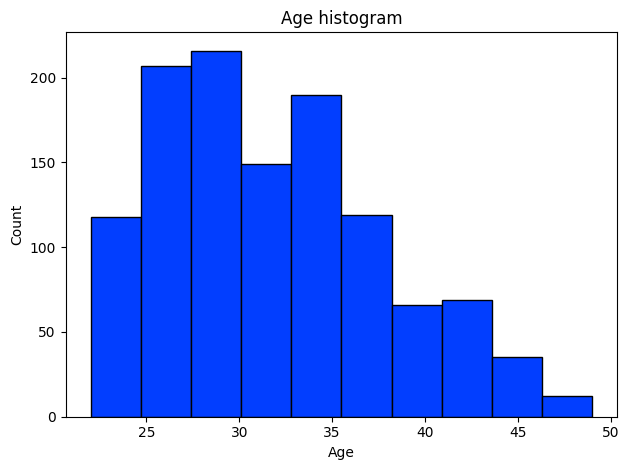

In [18]:
#Age
plt.hist(df_clean['Age'],edgecolor='black')
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

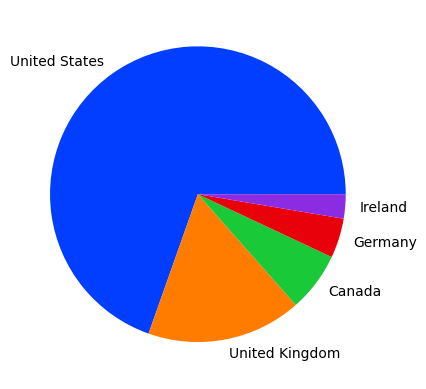

In [19]:
#Country
labels=df_clean['Country'].value_counts().head().index
plt.pie(df_clean['Country'].value_counts().head(),labels=labels)
plt.show()

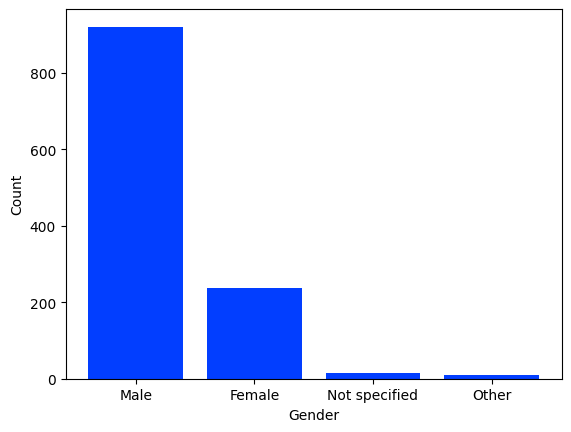

In [20]:
#Gender
labels=df_clean['Gender'].value_counts().index
plt.bar(labels,df_clean['Gender'].value_counts())
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

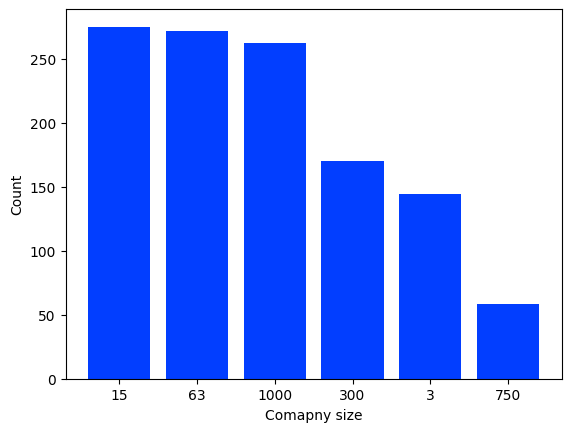

In [21]:
labels=df_clean['no_employees'].value_counts().index
plt.bar(labels.astype(str),df_clean['no_employees'].value_counts())
plt.xlabel("Comapny size")
plt.ylabel("Count")
plt.show()

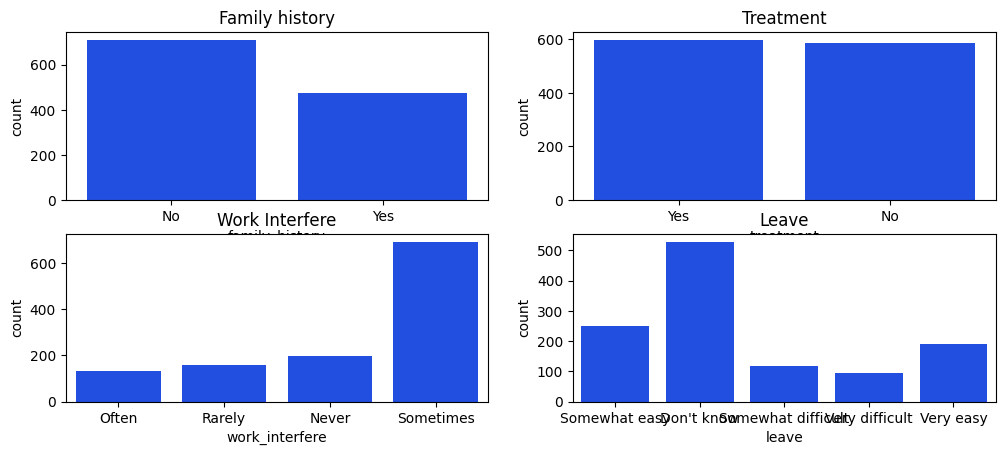

In [22]:
fig,axes=plt.subplots(2,2)
fig.set_figwidth(12,6)
sns.countplot(df_clean,x='family_history',ax=axes[0][0])
sns.countplot(df_clean,x='treatment',ax=axes[0][1])
sns.countplot(df_clean,x='leave',ax=axes[1][1])
sns.countplot(df_clean,x='work_interfere',ax=axes[1][0])
axes[0][0].set_title("Family history")
axes[0][1].set_title("Treatment")
ax=axes[1][1].set_title("Leave")
ax=axes[1][0].set_title("Work Interfere")
plt.show()


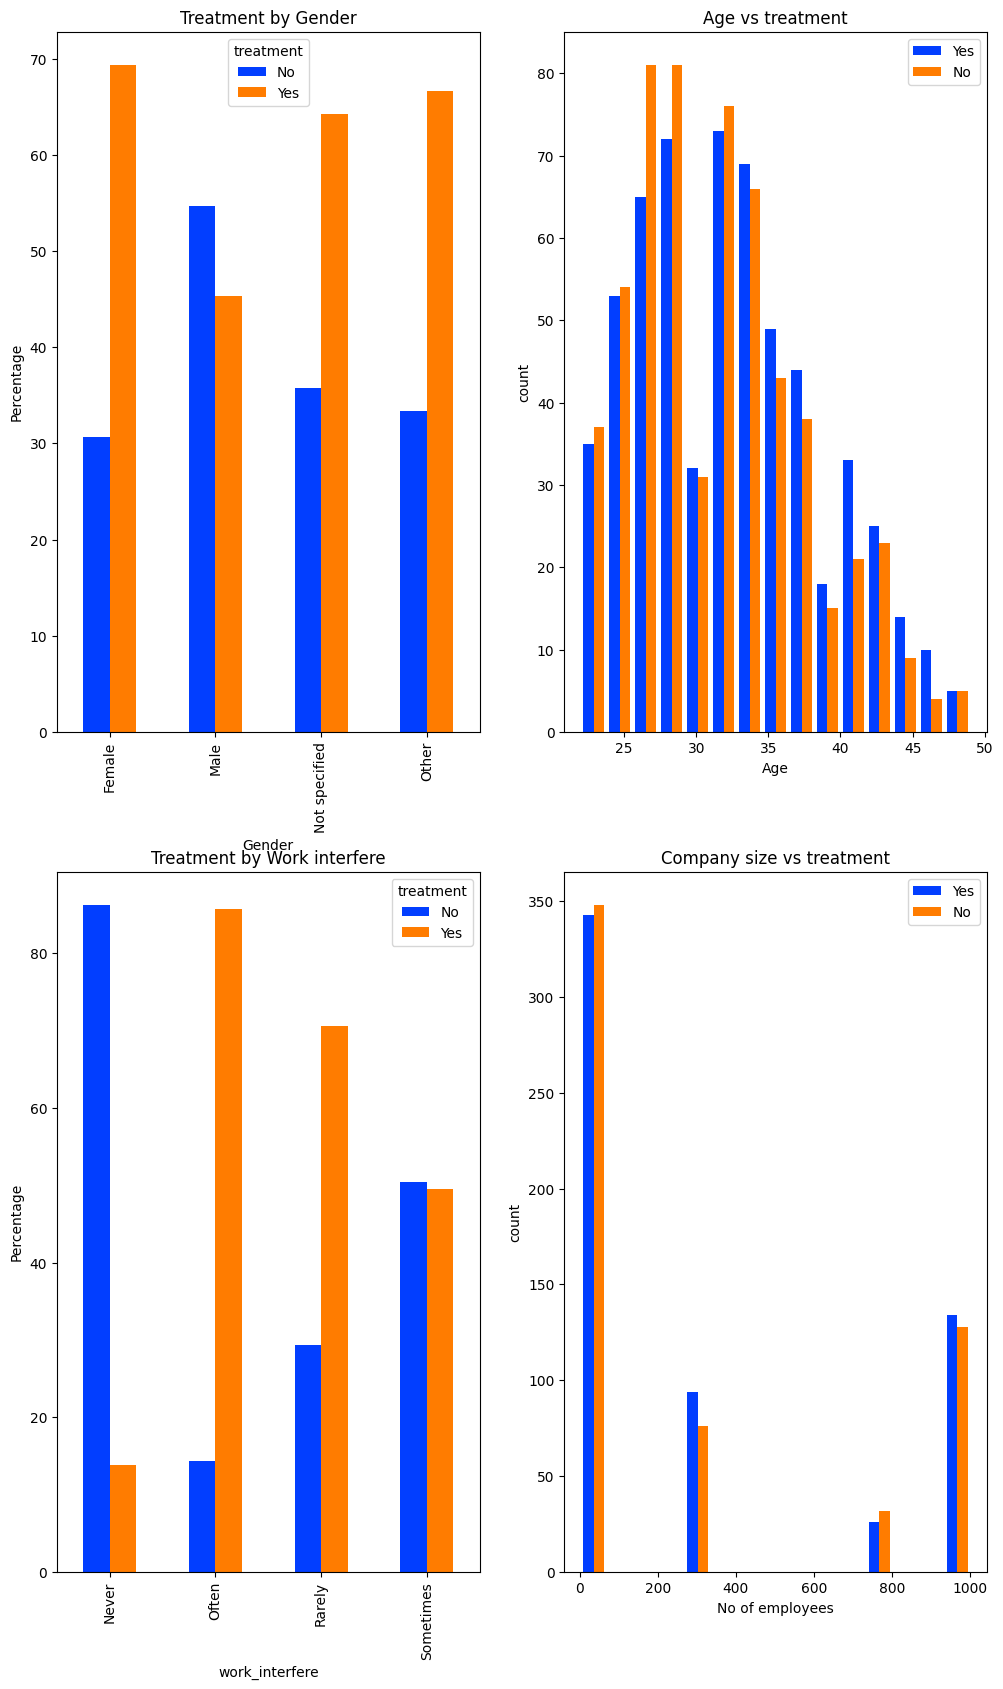

In [47]:
fig,axes=plt.subplots(2,2)
fig.set_figwidth(12,6)
fig.set_figheight(20)

gender_vis = pd.crosstab(df_clean['Gender'], df_clean['treatment'], normalize='index') *100
gender_vis.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment by Gender')
axes[0, 0].set_ylabel('Percentage')


axes[0, 1].hist(
    [
        df_clean[df_clean['treatment'] == 'Yes']['Age'],
        df_clean[df_clean['treatment'] == 'No']['Age']
    ],
    bins=15,
    label=['Yes', 'No'],
    
)
axes[0][1].set_title("Age vs treatment")
axes[0][1].set_xlabel("Age")
axes[0][1].set_ylabel("count")
axes[0][1].legend()



country_vis = pd.crosstab(df_clean['work_interfere'], df_clean['treatment'], normalize='index') *100
country_vis.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Treatment by Work interfere')
axes[1, 0].set_ylabel('Percentage')

axes[1, 1].hist(
    [
        df_clean[df_clean['treatment'] == 'Yes']['no_employees'],
        df_clean[df_clean['treatment'] == 'No']['no_employees']
    ],
    bins=15,
    label=['Yes', 'No'],
    
)
axes[1][1].set_title("Company size vs treatment")
axes[1][1].set_xlabel("No of employees")
axes[1][1].set_ylabel("count")
axes[1][1].legend()







Text(0, 0.5, 'Percentage')

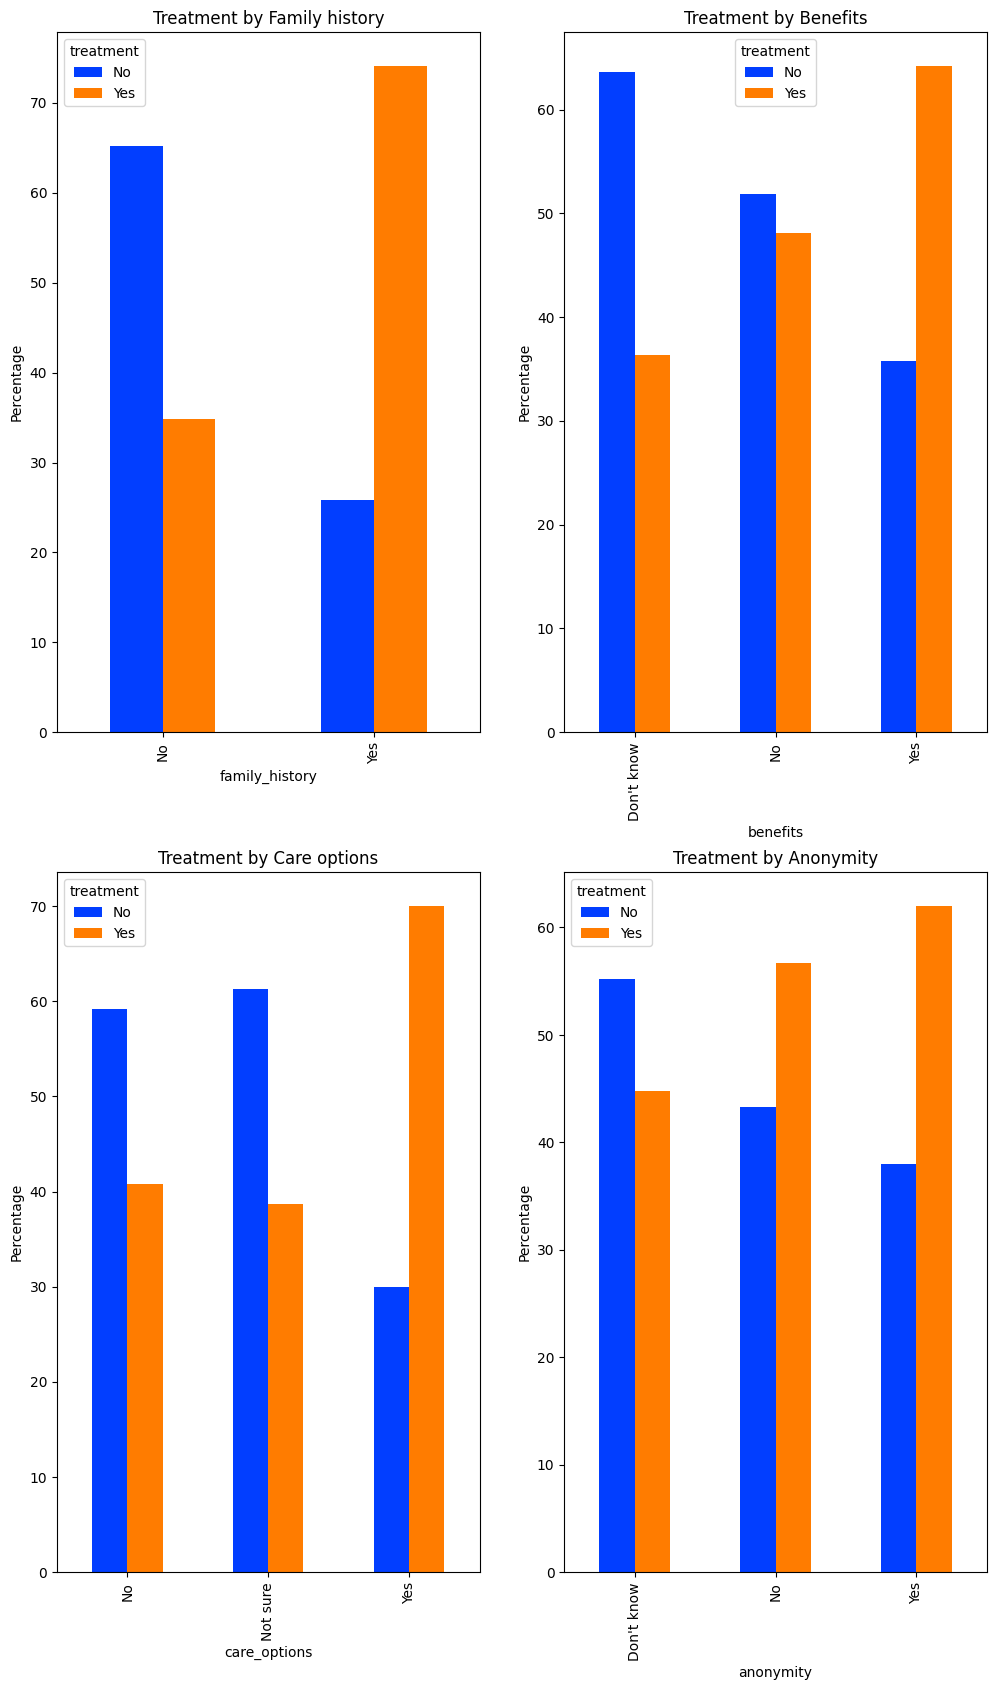

In [49]:
fig,axes=plt.subplots(2,2)
fig.set_figwidth(12,6)
fig.set_figheight(20)

famhis_vis = pd.crosstab(df_clean['family_history'], df_clean['treatment'], normalize='index') *100
famhis_vis.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment by Family history')
axes[0, 0].set_ylabel('Percentage')

benefits_vis = pd.crosstab(df_clean['benefits'], df_clean['treatment'], normalize='index') *100
benefits_vis.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Treatment by Benefits')
axes[0, 1].set_ylabel('Percentage')




care_options_vis = pd.crosstab(df_clean['care_options'], df_clean['treatment'], normalize='index') *100
care_options_vis.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Treatment by Care options')
axes[1, 0].set_ylabel('Percentage')

anonymity_vis = pd.crosstab(df_clean['anonymity'], df_clean['treatment'], normalize='index') *100
anonymity_vis.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Treatment by Anonymity')
axes[1, 1].set_ylabel('Percentage')





Text(0, 0.5, 'Percentage')

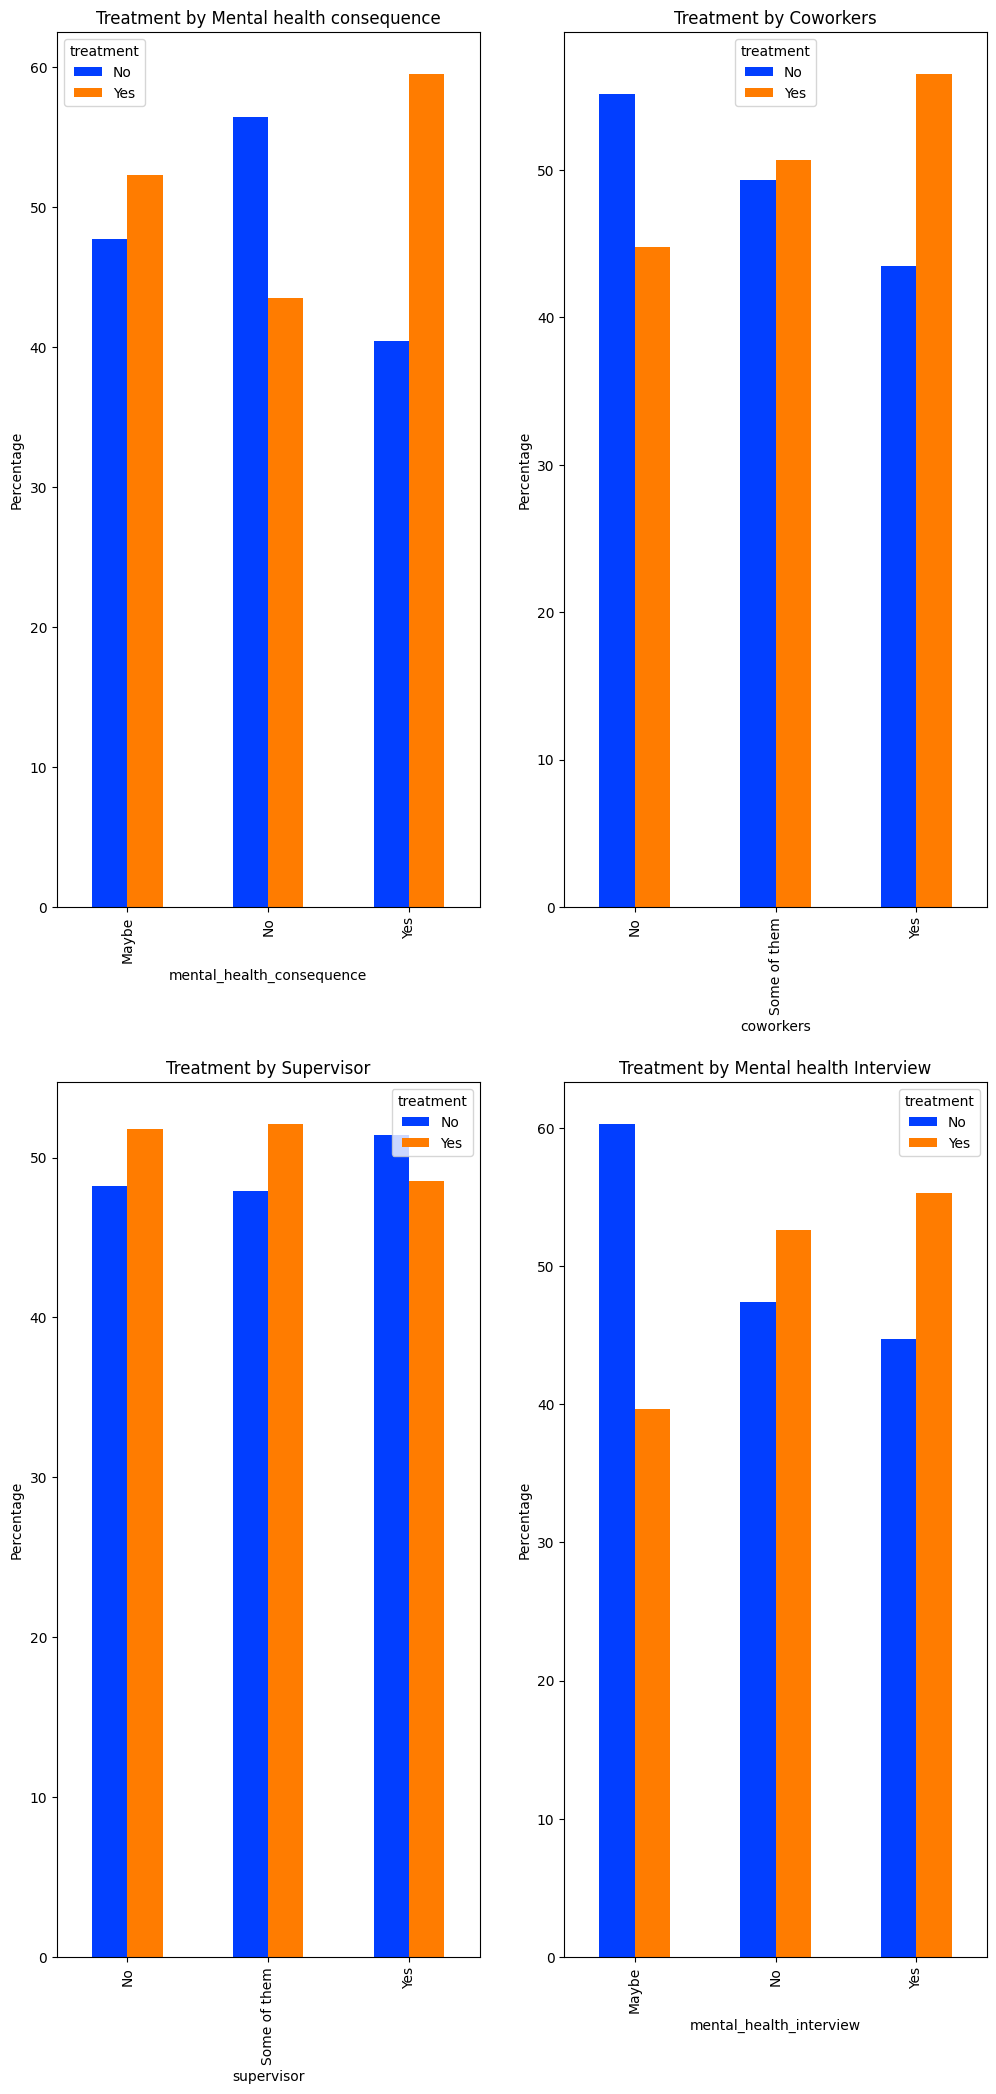

In [50]:
fig,axes=plt.subplots(2,2)
fig.set_figwidth(12,6)
fig.set_figheight(25)

mental_health_consequence_vis = pd.crosstab(df_clean['mental_health_consequence'], df_clean['treatment'], normalize='index') *100
mental_health_consequence_vis.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment by Mental health consequence')
axes[0, 0].set_ylabel('Percentage')

coworkers_vis = pd.crosstab(df_clean['coworkers'], df_clean['treatment'], normalize='index') *100
coworkers_vis.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Treatment by Coworkers')
axes[0, 1].set_ylabel('Percentage')




supervisor_vis = pd.crosstab(df_clean['supervisor'], df_clean['treatment'], normalize='index') *100
supervisor_vis.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Treatment by Supervisor')
axes[1, 0].set_ylabel('Percentage')

mental_health_interview_vis = pd.crosstab(df_clean['mental_health_interview'], df_clean['treatment'], normalize='index') *100
mental_health_interview_vis.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Treatment by Mental health Interview')
axes[1, 1].set_ylabel('Percentage')


<Axes: xlabel='work_interfere', ylabel='Age'>

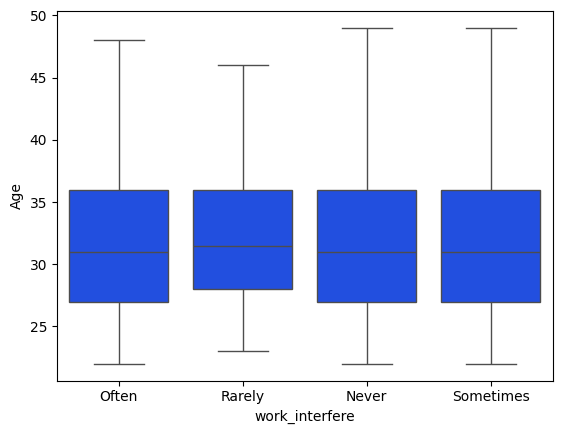

In [24]:
sns.boxplot(data=df_clean,x='work_interfere',y='Age')

<Axes: xlabel='treatment', ylabel='Age'>

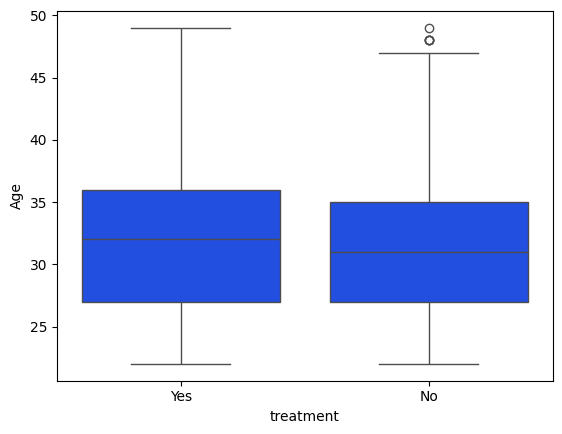

In [25]:
sns.boxplot(data=df_clean, x='treatment', y='Age')

Text(0, 0.5, 'Percentage')

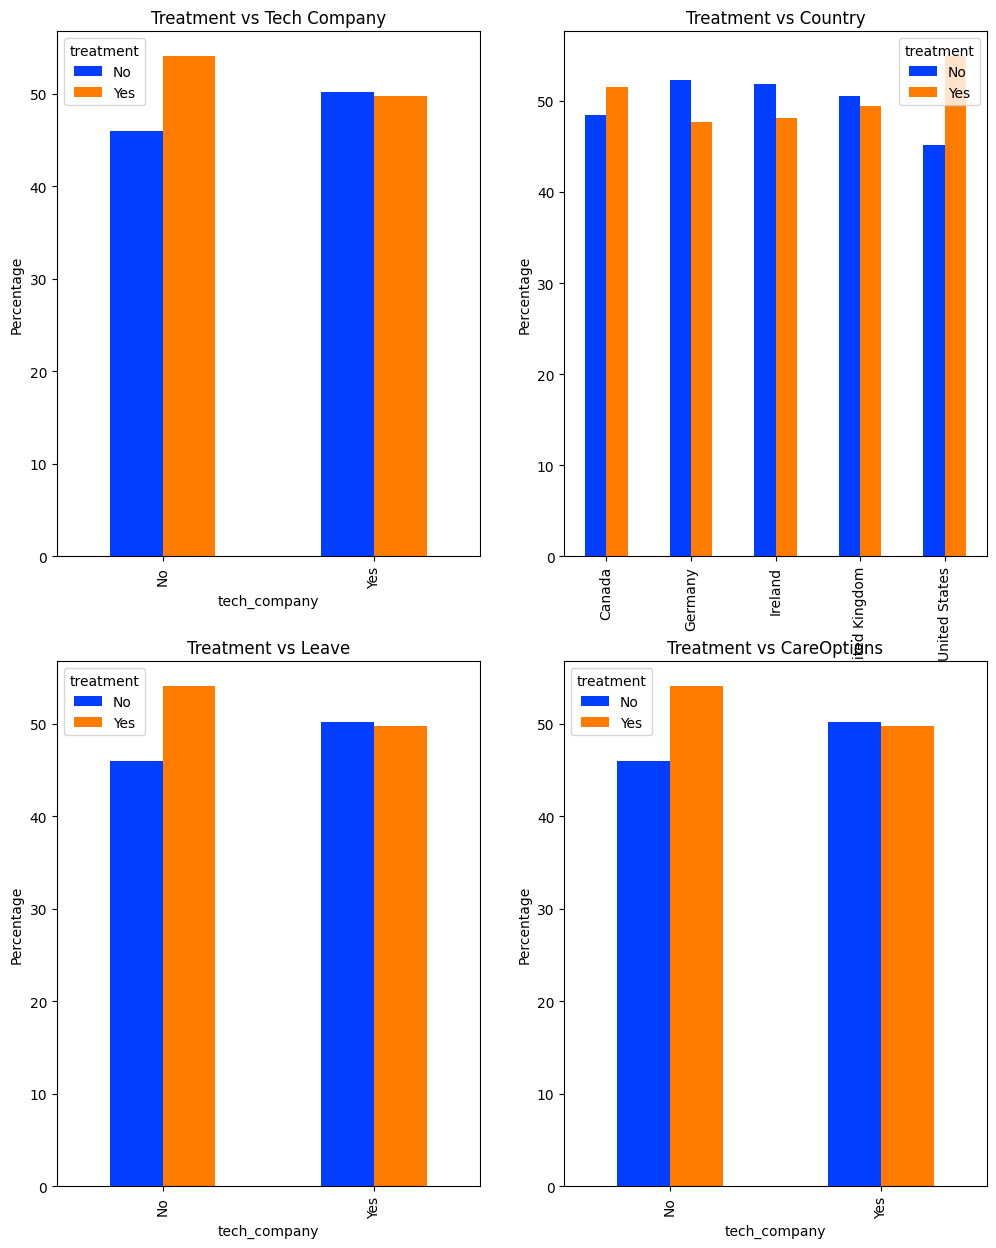

In [26]:
# sns.catplot(data=df, x='Gender', hue='treatment', col='work_interfere', kind='count')
fig,axes=plt.subplots(2,2)
fig.set_figwidth(12,5)
fig.set_figheight(15)

tech_vis = pd.crosstab(df_clean['tech_company'], df_clean['treatment'], normalize='index') *100
tech_vis.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment vs Tech Company')
axes[0, 0].set_ylabel('Percentage')


top_country=df_clean['Country'].value_counts().head().index
country_vis = pd.crosstab(df_clean['Country'][df_clean['Country'].isin(top_country)], df_clean['treatment'], normalize='index') *100
country_vis.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Treatment vs Country')
axes[0, 1].set_ylabel('Percentage')

leave_vis = pd.crosstab(df_clean['leave'], df_clean['treatment'], normalize='index') *100
tech_vis.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Treatment vs Leave')
axes[1, 0].set_ylabel('Percentage')

leave_vis = pd.crosstab(df_clean['care_options'], df_clean['treatment'], normalize='index') *100

tech_vis.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Treatment vs CareOptions')
axes[1, 1].set_ylabel('Percentage')


In [27]:
df_clean.info()
# sns.catplot(data=df,x='treatment',hue='seek_help',col='leave',kind='count')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1181 non-null   object
 1   Age                        1181 non-null   int64 
 2   Gender                     1181 non-null   object
 3   Country                    1181 non-null   object
 4   state                      1181 non-null   object
 5   self_employed              1181 non-null   object
 6   family_history             1181 non-null   object
 7   treatment                  1181 non-null   object
 8   work_interfere             1181 non-null   object
 9   no_employees               1181 non-null   int64 
 10  remote_work                1181 non-null   object
 11  tech_company               1181 non-null   object
 12  benefits                   1181 non-null   object
 13  care_options               1181 non-null   object
 14  wellness_prog

Multivariate Analysis

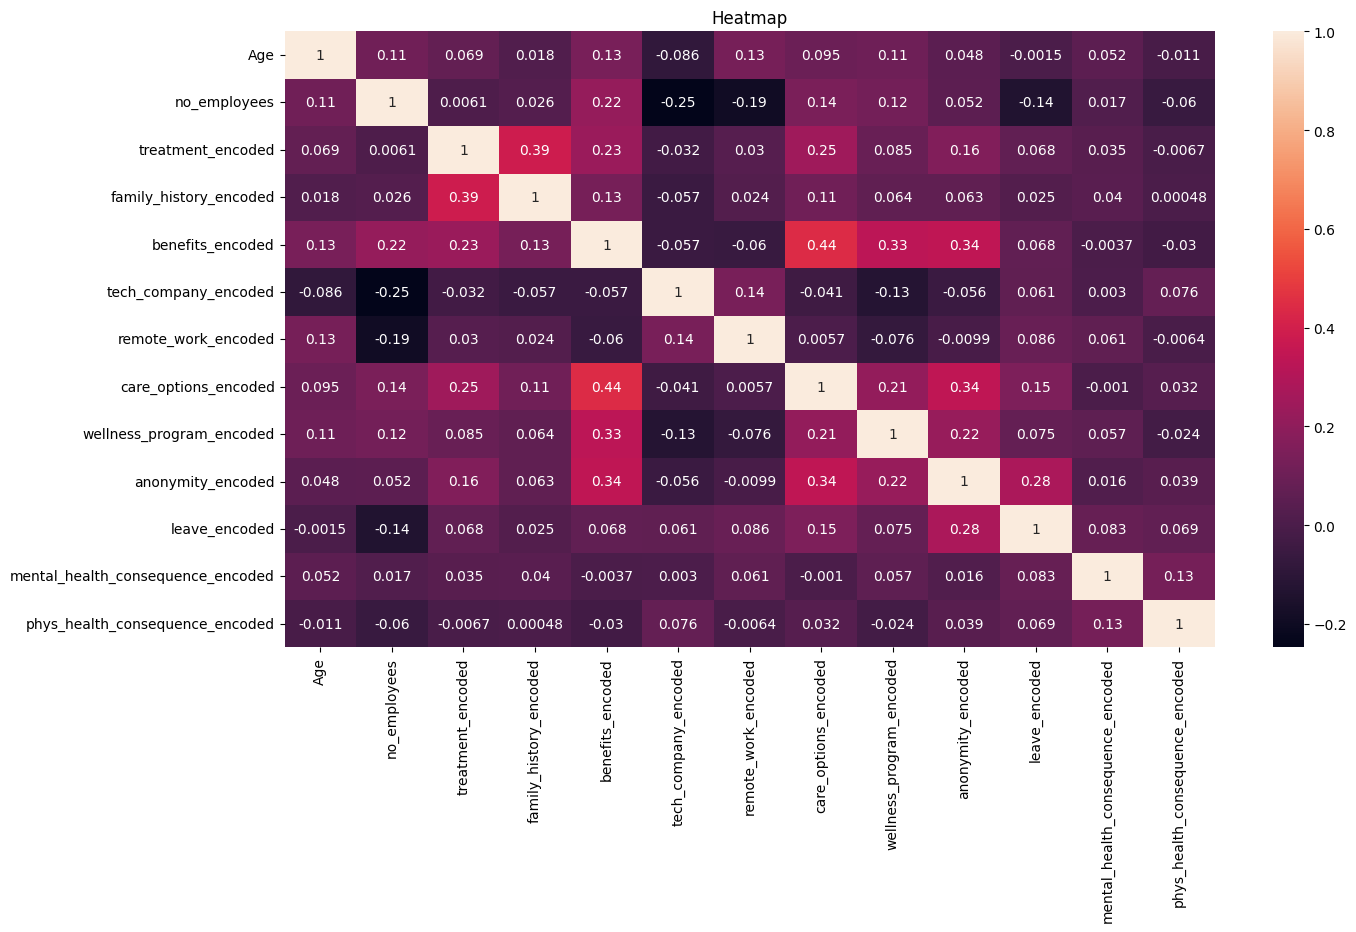

In [28]:
#plotting correlation matrix 
#Here Label encoder is used to map categorical columns with integer values
cat_columns=['treatment','family_history','benefits','tech_company','remote_work','care_options',
              'wellness_program','anonymity','leave','mental_health_consequence','phys_health_consequence']

final_cols=['Age','no_employees']
df_clean2=df_clean.copy()



from sklearn.preprocessing import LabelEncoder
for col in cat_columns:
    le = LabelEncoder()
    df_clean2[col + '_encoded'] = le.fit_transform(df_clean2[col])
    final_cols.append(col+'_encoded')

remaining_cols=[i for i in df_clean.columns if i not in final_cols]

df_clean2.drop(remaining_cols,axis=1,inplace=True)
corr=df_clean2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.title("Heatmap")
plt.show()



In [29]:
#Features having strong correlation  with Treatment column
print(corr['treatment_encoded'].sort_values(ascending=False).head())
df_clean2.head()

treatment_encoded         1.000000
family_history_encoded    0.385173
care_options_encoded      0.248024
benefits_encoded          0.234188
anonymity_encoded         0.158018
Name: treatment_encoded, dtype: float64


,Age,no_employees,treatment_encoded,family_history_encoded,benefits_encoded,tech_company_encoded,remote_work_encoded,care_options_encoded,wellness_program_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded
0,37,15,1,0,2,1,0,1,1,2,2,1,1
1,44,1000,0,0,0,0,0,0,0,0,0,0,1
2,32,15,0,0,1,1,0,0,1,0,1,1,1
3,31,63,1,1,1,1,0,2,1,1,1,2,2
4,31,300,0,0,2,1,1,0,0,0,0,1,1


<Figure size 2000x2000 with 0 Axes>

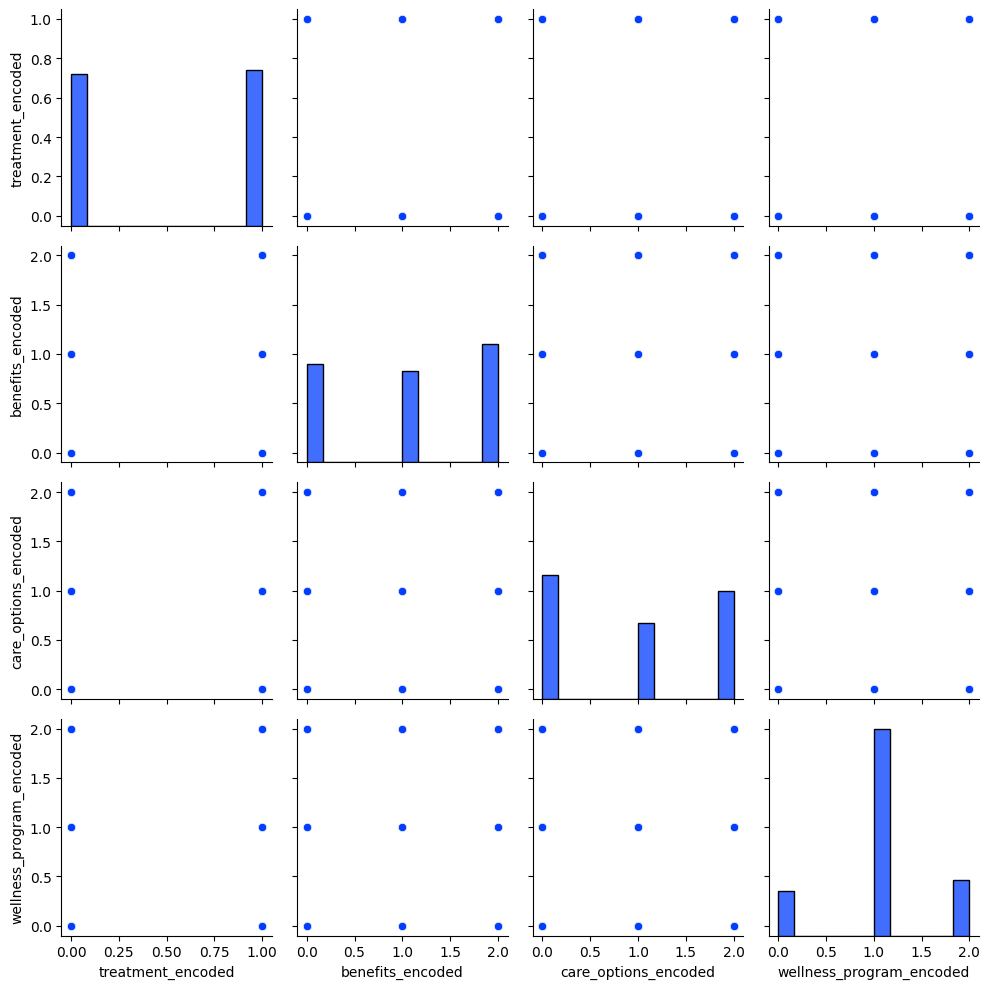

In [30]:
#Pairplot
plt.figure(figsize=(20,20))
sns.pairplot(df_clean2,vars=['treatment_encoded','benefits_encoded','care_options_encoded',
              'wellness_program_encoded'])
plt.tight_layout()
plt.show()


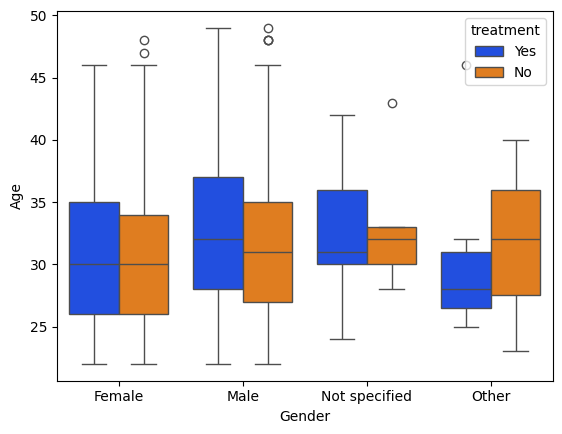

In [31]:
sns.boxplot(df_clean,x='Gender',y='Age',hue='treatment')
plt.show()

Key insights and patterns

In [32]:
# Age
print("Age vs Treatment:")
print(f" Age of Treatment(Yes) : {df_clean[df_clean['treatment'] == 'Yes']['Age'].mean()}")
print(f"Age of Treatment(No): {df_clean[df_clean['treatment'] == 'No']['Age'].mean()}")

# Gender
print("\n Gender vs treatment:")
gender_treatment_perc = df_clean.groupby('Gender')['treatment'].apply(lambda x: (x == 'Yes').mean()*100)
print(gender_treatment_perc)

#Country
print("\nCountry vs treatment:")
country_treatment_perc = df_clean.groupby('Country')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)
top_countries = country_treatment_perc.sort_values(ascending=False).head(5)

for country, rate in top_countries.items():
    print(f"\n {country}: {rate:.1f}%")


# Company size
print("\nCompany size vs treatment:")
company_treatment_perc = df_clean.groupby('no_employees')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)


for company_size, rate in company_treatment_perc.items():
    print(f"  {company_size}: {rate:.1f}%")

# remote work
print("\nRemote work vs Treatment")
remote_treatment_perc = df_clean.groupby('remote_work')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)


for remote_status, rate in remote_treatment_perc.items():
    print(f"  {remote_status}: {rate:.1f}%")

#  Family history
print("\nFamily history vs Treatment")
famHis_treatment_perc = df_clean.groupby('family_history')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)


for remote_status, rate in famHis_treatment_perc.items():
    print(f"  {remote_status}: {rate:.1f}%")


# Anonymity
print("\nAnonymity vs Treatment")
anon_treatment_perc  = df_clean.groupby('anonymity')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)


for remote_status, rate in anon_treatment_perc.items():
    print(f"  {remote_status}: {rate:.1f}%")

# Benefits
print("\nBenefits vs Treatment")
benefits_treatment_perc = df_clean.groupby('benefits')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)

for remote_status, rate in benefits_treatment_perc.items():
    print(f"  {remote_status}: {rate:.1f}%")

#Work interference
print("\nWork interference vs Treatment")
interfere_treatment_perc = df_clean.groupby('work_interfere')['treatment'].apply(lambda x: (x == 'Yes').mean() * 100)


for remote_status, rate in interfere_treatment_perc.items():
    print(f"  {remote_status}: {rate:.1f}%")




Age vs Treatment:
 Age of Treatment(Yes) : 32.25460636515913
Age of Treatment(No): 31.42294520547945

 Gender vs treatment:
Gender
Female           69.327731
Male             45.326087
Not specified    64.285714
Other            66.666667
Name: treatment, dtype: float64

Country vs treatment:

 Croatia: 100.0%

 Moldova: 100.0%

 Japan: 100.0%

 Denmark: 100.0%

 Australia: 65.0%

Company size vs treatment:
  3: 56.9%
  15: 43.6%
  63: 51.8%
  300: 55.3%
  750: 44.8%
  1000: 51.1%

Remote work vs Treatment
  No: 49.6%
  Yes: 52.9%

Family history vs Treatment
  No: 34.8%
  Yes: 74.2%

Anonymity vs Treatment
  Don't know: 44.8%
  No: 56.7%
  Yes: 62.0%

Benefits vs Treatment
  Don't know: 36.3%
  No: 48.1%
  Yes: 64.2%

Work interference vs Treatment
  Never: 13.8%
  Often: 85.7%
  Rarely: 70.6%
  Sometimes: 49.6%


In [33]:

df_clean.info()
import joblib
joblib.dump(df_clean,'df_clean.joblib')

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1181 non-null   object
 1   Age                        1181 non-null   int64 
 2   Gender                     1181 non-null   object
 3   Country                    1181 non-null   object
 4   state                      1181 non-null   object
 5   self_employed              1181 non-null   object
 6   family_history             1181 non-null   object
 7   treatment                  1181 non-null   object
 8   work_interfere             1181 non-null   object
 9   no_employees               1181 non-null   int64 
 10  remote_work                1181 non-null   object
 11  tech_company               1181 non-null   object
 12  benefits                   1181 non-null   object
 13  care_options               1181 non-null   object
 14  wellness_prog

['df_clean.joblib']